In [2]:
import pandas as pd
from textblob import TextBlob

In [3]:
from wordcloud import WordCloud

In [4]:
import nltk
import re

In [5]:
import matplotlib.pyplot as plt

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gayathri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [34]:
file = 'C:/Users/Gayathri/Desktop/sample.csv'
df  = pd.read_csv(file)

In [35]:
df

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,119237,105834,True,Wed Oct 11 06:55:44 +0000 2017,@AppleSupport causing the reply to be disregar...,119236,NaN
1,119238,ChaseSupport,False,Wed Oct 11 13:25:49 +0000 2017,@105835 Your business means a lot to us. Pleas...,NaN,119239.0
2,119239,105835,True,Wed Oct 11 13:00:09 +0000 2017,@76328 I really hope you all change but I'm su...,119238,NaN
3,119240,VirginTrains,False,Tue Oct 10 15:16:08 +0000 2017,@105836 LiveChat is online at the moment - htt...,119241,119242.0
4,119241,105836,True,Tue Oct 10 15:17:21 +0000 2017,@VirginTrains see attached error message. I've...,119243,119240.0
...,...,...,...,...,...,...,...
88,119330,105859,True,Wed Oct 11 13:50:42 +0000 2017,@105860 I wish Amazon had an option of where I...,119329,119331.0
89,119331,105860,True,Wed Oct 11 13:47:14 +0000 2017,They reschedule my shit for tomorrow https://t...,119330,NaN
90,119332,Tesco,False,Wed Oct 11 13:34:06 +0000 2017,"@105861 Hey Sara, sorry to hear of the issues ...",119333,119334.0
91,119333,105861,True,Wed Oct 11 14:05:18 +0000 2017,@Tesco bit of both - finding the layout cumber...,"119335,119336",119332.0


In [36]:
df.shape

(93, 7)

In [37]:
df['inbound'].value_counts()

True     49
False    44
Name: inbound, dtype: int64

In [38]:
df['text']

0     @AppleSupport causing the reply to be disregar...
1     @105835 Your business means a lot to us. Pleas...
2     @76328 I really hope you all change but I'm su...
3     @105836 LiveChat is online at the moment - htt...
4     @VirginTrains see attached error message. I've...
                            ...                        
88    @105860 I wish Amazon had an option of where I...
89    They reschedule my shit for tomorrow https://t...
90    @105861 Hey Sara, sorry to hear of the issues ...
91    @Tesco bit of both - finding the layout cumber...
92    @105861 If that doesn't help please DM your fu...
Name: text, Length: 93, dtype: object

In [39]:
STOPWORDS = set(stopwords.words('english'))


In [40]:
def remove_stopwords(text):
    text_nostop =[]
    for word in str(text).split():
        if word not in STOPWORDS:
            text_nostop.append(word)
    return " ".join(text_nostop)

In [41]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)



In [42]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)


In [43]:
df['text'] = df['text'].str.replace('[^a-zA-Z]', ' ')

In [44]:
df['text'] = df['text'].str.lower()

In [45]:
df['text'] = df['text'].apply(lambda x: cleaning_URLs(x))

In [46]:
df['text'] = df['text'].apply(lambda word: remove_stopwords(word))

In [47]:
df['text'] = df['text'].apply(lambda x: cleaning_numbers(x))

In [48]:
df.text

0     applesupport causing reply disregarded tapped ...
1     business means lot us please dm name zip code ...
2                               really hope change sure
3     livechat online moment https co sy vtu kq cont...
4     virgintrains see attached error message tried ...
                            ...                        
88    wish amazon option get shipped ups store avoid...
89             reschedule shit tomorrow https co rsvzct
90    hey sara sorry hear issues ask lay speed websi...
91    tesco bit finding layout cumbersome removing i...
92    help please dm full name address email includi...
Name: text, Length: 93, dtype: object

In [49]:
from textblob import TextBlob

def get_sentiment(dataframe, column):
    sentiment_values = [{'Polarity': v.sentiment.polarity, 
                         'Subjectivity': v.sentiment.subjectivity}
                       for v in dataframe[column].apply(TextBlob)]
    return pd.DataFrame(sentiment_values)

sent_df = get_sentiment(df, 'text')

df = pd.concat([df, sent_df.Polarity], axis=1)
df.loc[df.Polarity > 0, 'textblob_label'] = 'positive'
df.loc[df.Polarity == 0, 'textblob_label'] = 'neutral'
df.loc[df.Polarity < 0, 'textblob_label'] = 'negative'

df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,Polarity,textblob_label
0,119237,105834,True,Wed Oct 11 06:55:44 +0000 2017,applesupport causing reply disregarded tapped ...,119236,NaN,0.000,neutral
1,119238,ChaseSupport,False,Wed Oct 11 13:25:49 +0000 2017,business means lot us please dm name zip code ...,NaN,119239.0,0.000,neutral
2,119239,105835,True,Wed Oct 11 13:00:09 +0000 2017,really hope change sure,119238,NaN,0.350,positive
3,119240,VirginTrains,False,Tue Oct 10 15:16:08 +0000 2017,livechat online moment https co sy vtu kq cont...,119241,119242.0,0.000,neutral
4,119241,105836,True,Tue Oct 10 15:17:21 +0000 2017,virgintrains see attached error message tried ...,119243,119240.0,-0.125,negative


In [50]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df['text'] = df['text'].apply(lambda text: lemmatize_words(text))
df.text

0     applesupport causing reply disregarded tapped ...
1     business mean lot u please dm name zip code ad...
2                               really hope change sure
3     livechat online moment http co sy vtu kq conta...
4     virgintrains see attached error message tried ...
                            ...                        
88    wish amazon option get shipped ups store avoid...
89              reschedule shit tomorrow http co rsvzct
90    hey sara sorry hear issue ask lay speed websit...
91    tesco bit finding layout cumbersome removing i...
92    help please dm full name address email includi...
Name: text, Length: 93, dtype: object

In [59]:
from nltk.tokenize import word_tokenize

df['text'] = df['text'].apply(lambda word: word_tokenize(word))

In [60]:
df.text

0     [applesupport, causing, reply, disregarded, ta...
1     [business, mean, lot, u, please, dm, name, zip...
2                          [really, hope, change, sure]
3     [livechat, online, moment, http, co, sy, vtu, ...
4     [virgintrains, see, attached, error, message, ...
                            ...                        
88    [wish, amazon, option, get, shipped, ups, stor...
89       [reschedule, shit, tomorrow, http, co, rsvzct]
90    [hey, sara, sorry, hear, issue, ask, lay, spee...
91    [tesco, bit, finding, layout, cumbersome, remo...
92    [help, please, dm, full, name, address, email,...
Name: text, Length: 93, dtype: object

In [61]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

df['text'] = df['text'].apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
df.head(5)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,Polarity,textblob_label
0,119237,105834,True,Wed Oct 11 06:55:44 +0000 2017,"[applesupport, caus, repli, disregard, tap, no...",119236,NaN,0.000,neutral
1,119238,ChaseSupport,False,Wed Oct 11 13:25:49 +0000 2017,"[busi, mean, lot, u, pleas, dm, name, zip, cod...",NaN,119239.0,0.000,neutral
2,119239,105835,True,Wed Oct 11 13:00:09 +0000 2017,"[realli, hope, chang, sure]",119238,NaN,0.350,positive
3,119240,VirginTrains,False,Tue Oct 10 15:16:08 +0000 2017,"[livechat, onlin, moment, http, co, sy, vtu, k...",119241,119242.0,0.000,neutral
4,119241,105836,True,Tue Oct 10 15:17:21 +0000 2017,"[virgintrain, see, attach, error, messag, tri,...",119243,119240.0,-0.125,negative


In [62]:
df['text'] = df['text'].apply(lambda x: ' '.join(x))

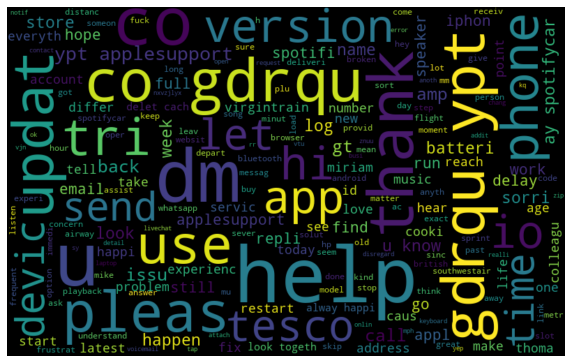

In [75]:
all_words = ' '.join([text for text in df['text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

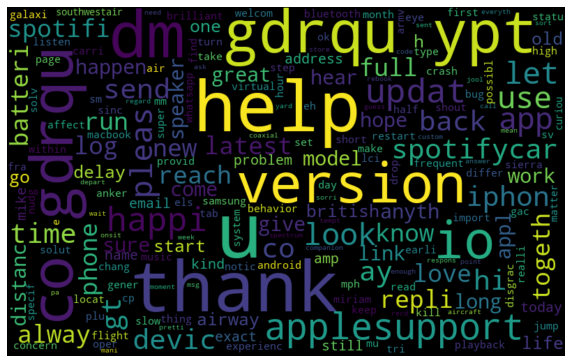

In [76]:
all_words = ' '.join([text for text in df['text'][df['textblob_label'] == 'positive']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [64]:
X = df['text']

In [65]:
X

0     applesupport caus repli disregard tap notif ke...
1     busi mean lot u pleas dm name zip code addit d...
2                                realli hope chang sure
3     livechat onlin moment http co sy vtu kq contac...
4     virgintrain see attach error messag tri leav v...
                            ...                        
88    wish amazon option get ship up store avoid lot...
89               reschedul shit tomorrow http co rsvzct
90    hey sara sorri hear issu ask lay speed websit ...
91    tesco bit find layout cumbersom remov item fav...
92    help pleas dm full name address email includ b...
Name: text, Length: 93, dtype: object

In [67]:
y = df['textblob_label']

In [68]:
y.value_counts()

positive    40
neutral     34
negative    19
Name: textblob_label, dtype: int64

**TF-IDF Features**

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [71]:
vectoriser = TfidfVectorizer()
vectoriser.fit(X)


TfidfVectorizer()

In [72]:
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  475


In [73]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [74]:
X_train

<88x475 sparse matrix of type '<class 'numpy.float64'>'
	with 931 stored elements in Compressed Sparse Row format>